## Setup S3 and EC2

In [ ]:
import boto3

s3 = boto3.client('s3')

bucket_name = 'my-text-classification-data'
s3.create_bucket(Bucket=bucket_name)


{'ResponseMetadata': {'RequestId': 'WNA5M06SKQXRKQ8J',
  'HostId': 'khDBG96nz8ZG0twtKnnLYiUt8sGO4PbatNecNQqnxHK/DX9ojM2joY3gfV7AeAnZoY4ThiYGzdjoN2Rem5v7rmYeWTpUroMy',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amz-id-2': 'khDBG96nz8ZG0twtKnnLYiUt8sGO4PbatNecNQqnxHK/DX9ojM2joY3gfV7AeAnZoY4ThiYGzdjoN2Rem5v7rmYeWTpUroMy',
   'x-amz-request-id': 'WNA5M06SKQXRKQ8J',
   'date': 'Sat, 12 Oct 2024 13:17:41 GMT',
   'location': '/my-text-classification-data',
   'server': 'AmazonS3',
   'content-length': '0'},
  'RetryAttempts': 0},
 'Location': '/my-text-classification-data'}

In [ ]:
# List all buckets
response = s3.list_buckets()
response

{'ResponseMetadata': {'RequestId': 'N6W13GS425K78620',
  'HostId': 'lj7I6basGW0BKg06vf7jfzdEKc/8z3oTGftJwQvCU+6yh2/B6V2bGimq8LQQ1dPP3CSQkB/6USo=',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amz-id-2': 'lj7I6basGW0BKg06vf7jfzdEKc/8z3oTGftJwQvCU+6yh2/B6V2bGimq8LQQ1dPP3CSQkB/6USo=',
   'x-amz-request-id': 'N6W13GS425K78620',
   'date': 'Sat, 12 Oct 2024 13:35:49 GMT',
   'content-type': 'application/xml',
   'transfer-encoding': 'chunked',
   'server': 'AmazonS3'},
  'RetryAttempts': 0},
 'Buckets': [{'Name': 'c134899a3421700l7933664t1w72797273630-lambdabucket-8ot4dahl32g9',
   'CreationDate': datetime.datetime(2024, 10, 12, 13, 8, 13, tzinfo=tzlocal())},
  {'Name': 'c134899a3421700l7933664t1w727972736301-labbucket-02nefiosqyl6',
   'CreationDate': datetime.datetime(2024, 10, 12, 13, 8, 14, tzinfo=tzlocal())},
  {'Name': 'my-text-classification-data',
   'CreationDate': datetime.datetime(2024, 10, 12, 13, 17, 41, tzinfo=tzlocal())}],
 'Owner': {'DisplayName': 'awslabsc0w6830096t1701111

In [ ]:
ec2 = boto3.client('ec2')

# Launch an EC2 instance
instances = ec2.run_instances(
    ImageId='ami-0fff1b9a61dec8a5f',  # from consle
    MinCount=1,
    MaxCount=1,
    InstanceType='t2.micro',  # Free tier
    KeyName='' ##
)

## non configurable due to constrains of the lab

An error occurred (UnauthorizedOperation) when calling the CreateKeyPair operation: You are not authorized to perform this operation. User: arn:aws:sts::727972736301:assumed-role/c134899a3421700l7933664t1w72-SageMakerExecutionRole-dFD9vzXsCZQd/SageMaker is not authorized to perform: ec2:CreateKeyPair on resource: arn:aws:ec2:us-east-1:727972736301:key-pair/my-ec2-keypair because no identity-based policy allows the ec2:CreateKeyPair action. Encoded authorization failure message: -X-YrYJXjlOaouoIXG63bgynxaT1yWomVLFuWDoXp9gFk4bJdsI12qU94v00sAkzUDWn4HhpB_mCkmsq0ZwvVXiIQd6hpBpTxs8JcT-LK0Lo4SEuBAclwzVd2XETvfnMVNhFfVQl6fAtK8d9YSuwNC_uoJua-q_XkIWoA51l1JLPMmiy29sfSVLvx4K8MLSKhTHzVTO0r7Uzw-920w9YceXm74nmqTUF33pupvMdK9q347Z3eugHsjjQl-OBeEGJtvaAPQVzNZonS-b28Qmts3opGdx6_ba4PVx4e7i39A8ELCpjDa1-04-ACQihJk4K4J56FDxroHkAPkL6QHGzCODzRTLRevZxS5gZ-Np1e-sMb7czu0A38pW5AVAqiHKVs6PKbDU1pJX-yOCsHd__oRxT54x6J7_VuZKYB3e5W8b0ih15WSEGLdh36ciw_l6SQlr00CETeLAOqWx77gWtyvz8JUanZ9tvuWzK_jLVFg31avQ5f04cbQGS9GFV_YE6Bkk6R

In [ ]:
from botocore.exceptions import NoCredentialsError


file_path = 'bbc_data.csv'
bucket_name = 'my-text-classification-data'
object_name = 'bbc_data.csv'


try:
    # Upload the file to S3
    s3.upload_file(file_path, bucket_name, object_name)
    print(f"File '{file_path}' uploaded to bucket '{bucket_name}' as '{object_name}'")
except FileNotFoundError:
    print("The file was not found")
except NoCredentialsError:
    print("Credentials not available")


File 'bbc_data.csv' uploaded to bucket 'my-text-classification-data' as 'bbc_data.csv'


## Data Cleaning and processing

In [ ]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
df=pd.read_csv("bbc_data.csv")

In [ ]:
df.head()

,data,labels
0,Musicians to tackle US red tape Musicians gro...,entertainment
1,"U2s desire to be number one U2, who have won ...",entertainment
2,Rocker Doherty in on-stage fight Rock singer ...,entertainment
3,Snicket tops US box office chart The film ada...,entertainment
4,"Oceans Twelve raids box office Oceans Twelve,...",entertainment


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   data    2225 non-null   object
 1   labels  2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [ ]:
df.describe()

,data,labels
count,2225,2225
unique,2126,5
top,Web radio takes Spanish rap global Spin the r...,sport
freq,2,511


In [ ]:
df.duplicated().sum()

99

In [ ]:
df.drop_duplicates(keep="first", inplace=True)
df

,data,labels
0,Musicians to tackle US red tape Musicians gro...,entertainment
1,"U2s desire to be number one U2, who have won ...",entertainment
2,Rocker Doherty in on-stage fight Rock singer ...,entertainment
3,Snicket tops US box office chart The film ada...,entertainment
4,"Oceans Twelve raids box office Oceans Twelve,...",entertainment
...,...,...
2220,Warning over Windows Word files Writing a Mic...,tech
2221,Fast lifts rise into record books Two high-sp...,tech
2222,Nintendo adds media playing to DS Nintendo is...,tech
2223,Fast moving phone viruses appear Security fir...,tech


In [ ]:
stop_words = set(stopwords.words("english"))

In [ ]:
lemma = WordNetLemmatizer()

In [ ]:
def preprocessing(txt):
    tokens = word_tokenize(txt)

    words = [lemma.lemmatize(token) for token in tokens if token.isalpha() and token not in stop_words]
#     for token in tokens:
#         if token.isalpha() and token not in stop_words:
#             words.append(lemma.lemmatize(token))

    return " ".join(words)

In [ ]:
txt = df["data"][0]
txt

'Musicians to tackle US red tape  Musicians groups are to tackle US visa regulations which are blamed for hindering British acts chances of succeeding across the Atlantic.  A singer hoping to perform in the US can expect to pay $1,300 (xc2xa3680) simply for obtaining a visa. Groups including the Musicians Union are calling for an end to the "raw deal" faced by British performers. US acts are not faced with comparable expense and bureaucracy when visiting the UK for promotional purposes.  Nigel McCune from the Musicians Union said British musicians are "disadvantaged" compared to their US counterparts. A sponsor has to make a petition on their behalf, which is a form amounting to nearly 30 pages, while musicians face tougher regulations than athletes and journalists. "If you make a mistake on your form, you risk a five-year ban and thus the ability to further your career," says Mr McCune.  "The US is the worlds biggest music market, which means something has to be done about the creaky 

In [ ]:
txt2 = preprocessing(txt)
txt2

'Musicians tackle US red tape Musicians group tackle US visa regulation blamed hindering British act chance succeeding across Atlantic A singer hoping perform US expect pay simply obtaining visa Groups including Musicians Union calling end raw deal faced British performer US act faced comparable expense bureaucracy visiting UK promotional purpose Nigel McCune Musicians Union said British musician disadvantaged compared US counterpart A sponsor make petition behalf form amounting nearly page musician face tougher regulation athlete journalist If make mistake form risk ban thus ability career say Mr McCune The US world biggest music market mean something done creaky bureaucracy say Mr McCune The current situation preventing British act maintaining momentum developing US added The Musicians Union stance endorsed Music Managers Forum MMF say British artist face uphill struggle succeed US thanks tough visa requirement also seen impractical The MMFs general secretary James Seller said Imagin

In [ ]:
df["data"] = df["data"].apply(preprocessing)

In [ ]:
encoder=LabelEncoder()
df['labels']=encoder.fit_transform(df['labels'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df["data"], df["labels"], test_size=0.2, random_state=42)

In [ ]:
vectorizer = TfidfVectorizer()

X_train_cv = vectorizer.fit_transform(X_train)
X_test_cv = vectorizer.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr.fit(X_train_cv, y_train)
print(f"Train Score: {lr.score(X_train_cv, y_train)}\n")
y_pred = lr.predict(X_test_cv)
print(f"Test Score: {lr.score(X_test_cv, y_test)}\n")
print(f"Classification Report:\n {classification_report(y_test, y_pred)}\n")
print(f"Confusion Matrix:\n {confusion_matrix(y_test, y_pred)}")

Train Score: 0.9958823529411764

Test Score: 0.9741784037558685

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.94      0.96       108
           1       0.99      0.99      0.99        74
           2       0.95      0.99      0.97        80
           3       0.99      1.00      0.99        91
           4       0.96      0.97      0.97        73

    accuracy                           0.97       426
   macro avg       0.97      0.98      0.97       426
weighted avg       0.97      0.97      0.97       426


Confusion Matrix:
 [[101   0   3   1   3]
 [  0  73   1   0   0]
 [  0   1  79   0   0]
 [  0   0   0  91   0]
 [  2   0   0   0  71]]


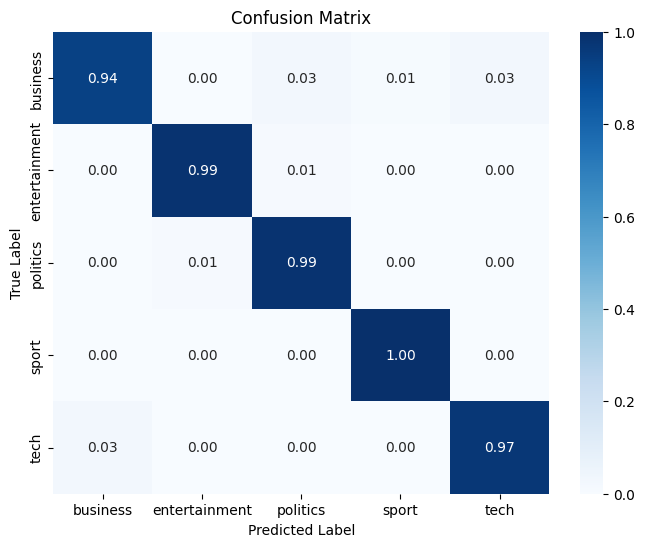

In [ ]:
# prompt: visualizie the confusion matrix   with ratio

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you have y_test and y_pred from your code

cm = confusion_matrix(y_test, y_pred)

# Normalize the confusion matrix
cm_ratio = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 6))
sns.heatmap(cm_ratio, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
y_pred = lr.predict(X_test_cv)


In [ ]:
wrong_prediction = X_test[y_pred != y_test]
df_wrong_prediction = wrong_prediction.to_frame(name='data')

In [ ]:
df_wrong_prediction["len"] = df_wrong_prediction["data"].apply(lambda x: len(x))

In [ ]:
df_wrong_prediction

,data,len
635,Ban forced retirement Employers longer able fo...,1250
770,World leader gather face uncertainty More busi...,3173
860,BT offer equal access rival BT moved possible ...,2636
475,Arsenal may seek full share listing Arsenal Da...,1759
1972,Who think The real danger happens data cross n...,3348
2022,US blogger fired airline A US airline attendan...,2248
1646,UK help raped Rwandan woman Britain give grant...,799
805,News Corp eye video game market News Corp medi...,964
830,Salary scandal Cameroon Cameroon say widesprea...,1259
786,News Corp eye video game market News Corp medi...,1280


from matplotlib import pyplot as plt
df_wrong_prediction['len'].plot(kind='hist', bins=20, title='len')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_wrong_prediction['len'].plot(kind='line', figsize=(8, 4), title='len')
plt.gca().spines[['top', 'right']].set_visible(False)

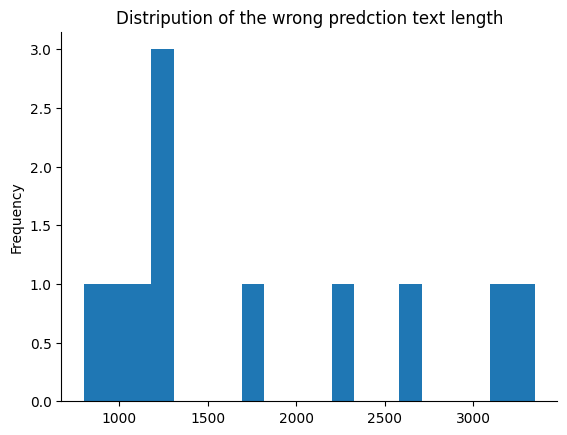

In [ ]:
from matplotlib import pyplot as plt
df_wrong_prediction['len'].plot(kind='hist', bins=20, title='Distripution of the wrong predction text length')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
right_prediction = X_test[y_pred == y_test]
df_right_prediction = right_prediction.to_frame(name='data')
df_right_prediction["len"] = df_right_prediction["data"].apply(lambda x: len(x))

In [ ]:
df_right_prediction

,data,len
290,Media seek Jackson juror note Reporters coveri...,1463
2061,Game firm hold cast audition Video game firm B...,1083
1747,Citizenship event touted Citizenship ceremony ...,2287
1012,McIlroy continues winning streak James McIlroy...,858
2081,Solutions net security fear Fake bank phishing...,3426
...,...,...
313,Johnny Cash manager Holiff dy The former manag...,802
997,Newcastle Bolton Kieron Dyer smashed home winn...,2404
628,Venezuela China sign oil deal Venezuelan presi...,1352
2199,Humanoid robot learns run Hondas humanoid robo...,1573


from matplotlib import pyplot as plt
df_right_prediction['len'].plot(kind='hist', bins=20, title='len')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_right_prediction['len'].plot(kind='line', figsize=(8, 4), title='len')
plt.gca().spines[['top', 'right']].set_visible(False)

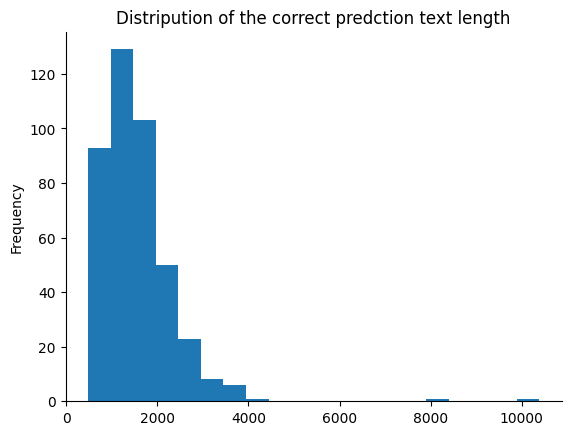

In [ ]:
from matplotlib import pyplot as plt
df_right_prediction['len'].plot(kind='hist', bins=20, title='Distripution of the correct predction text length')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
X_test_df = X_test
X_test_df = X_test_df.to_frame(name='data')

X_test_df["y_pred"] = encoder.inverse_transform(y_pred)
X_test_df["y_test"] = encoder.inverse_transform(y_test)

wrong_prediction = X_test_df[X_test_df["y_pred"] != X_test_df["y_test"]]

In [ ]:
# True business and said politics

business_politics = wrong_prediction[(wrong_prediction["y_test"] == "business") & (wrong_prediction["y_pred"] == "politics")]
business_politics

all_texts = " ".join(business_politics["data"].tolist())
all_texts

'Ban forced retirement Employers longer able force worker retire unless justify The government announced firm barred imposing arbitrary retirement age Under new European age discrimination rule default retirement age introduced Workers permitted request staying beyond compulsory retirement age although employer right refuse Trade Industry Secretary Patricia Hewitt said people would forced work longer wanted saying default age statutory compulsory retirement age She said employer would free continue employing people long competent Under age discrimination proposal Department Trade Industry last year worker allowed work till wished Business leader opposed plan said would costly cumbersome The British Chambers Commerce welcomed latest proposal This move today best world said Employers ability define end point relationship employee flexibility right request work past age But Age Concern said imposing retirement age cowardly complete This make mockery Governments commitment outlawing ageism

In [ ]:
# prompt: make a dict with each word and its count

import re
from collections import defaultdict

def count_words(filename):
  word_counts = defaultdict(int)
  for word in all_texts.split():
        word_counts[word] += 1
  return dict(word_counts)

# Replace 'filename.txt' with the actual file path
word_counts = count_words(all_texts)
print(word_counts)

{'Ban': 1, 'forced': 2, 'retirement': 7, 'Employers': 2, 'longer': 2, 'able': 1, 'force': 1, 'worker': 4, 'retire': 1, 'unless': 1, 'justify': 1, 'The': 15, 'government': 10, 'announced': 2, 'firm': 1, 'barred': 1, 'imposing': 2, 'arbitrary': 1, 'age': 11, 'Under': 2, 'new': 4, 'European': 4, 'discrimination': 3, 'rule': 1, 'default': 2, 'introduced': 1, 'Workers': 1, 'permitted': 1, 'request': 2, 'staying': 1, 'beyond': 1, 'compulsory': 2, 'although': 2, 'employer': 2, 'right': 2, 'refuse': 1, 'Trade': 2, 'Industry': 2, 'Secretary': 1, 'Patricia': 1, 'Hewitt': 1, 'said': 14, 'people': 3, 'would': 4, 'work': 4, 'wanted': 1, 'saying': 1, 'statutory': 1, 'She': 1, 'free': 1, 'continue': 1, 'employing': 1, 'long': 1, 'competent': 1, 'proposal': 2, 'Department': 1, 'last': 3, 'year': 6, 'allowed': 1, 'till': 1, 'wished': 1, 'Business': 1, 'leader': 9, 'opposed': 1, 'plan': 2, 'costly': 1, 'cumbersome': 1, 'British': 1, 'Chambers': 1, 'Commerce': 1, 'welcomed': 1, 'latest': 1, 'This': 2, 'm

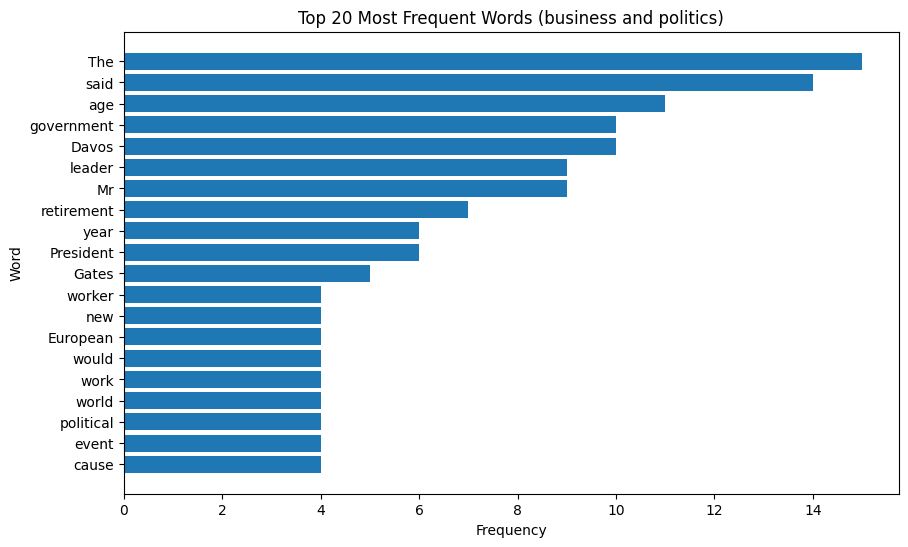

In [ ]:
# The most frequent words in wrong buisness text as politics
sorted_word_counts = dict(sorted(word_counts.items(), key=lambda item: item[1], reverse=True))

plt.figure(figsize=(10, 6))
plt.barh(list(sorted_word_counts.keys())[:20], list(sorted_word_counts.values())[:20])
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.title("Top 20 Most Frequent Words (business and politics)")
plt.gca().invert_yaxis()  # Invert y-axis to display most frequent words at the top
plt.show()

In [ ]:
# prompt: get the learned func from the lr model

# Get the learned coefficients from the logistic regression model
coefficients = lr.coef_

# Get the feature names from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Create a dictionary to store the coefficients and their corresponding feature names
learned_func = dict(zip(feature_names, coefficients[0]))

print(learned_func)

{'aa': -0.009601177176505727, 'aaa': -0.011707699591246783, 'aaas': -0.05170140497645543, 'aadc': -0.007620963821603675, 'aaliyah': -0.04109491326215238, 'aaliyahs': -0.013698304420717488, 'aaltra': -0.0014877380610789498, 'aamir': -0.003902082689974917, 'aara': 0.008522007384526353, 'aaron': -0.0161865579982232, 'abacus': -0.0016266766092914427, 'abandon': 0.004865763405619343, 'abandoned': -0.023679288225562145, 'abandoning': 0.020063623313884053, 'abandonment': -0.0084683803009802, 'abate': -0.008122516711284555, 'abatement': -0.0017907749034615284, 'abating': -0.00905233790582374, 'abba': -0.050699529599903315, 'abbas': -0.054476606105726855, 'abbasi': -0.025846194993018136, 'abbey': 0.025760453432725865, 'abbot': -0.005542063282011767, 'abbott': -0.04794385424243169, 'abbotts': -0.005958155118764752, 'abc': -0.1343006196402804, 'abd': 0.015158670920245663, 'abdellatif': -0.002982117694538567, 'abdication': -0.007726117471957846, 'abdomen': -0.006456527891619555, 'abdominal': -0.00

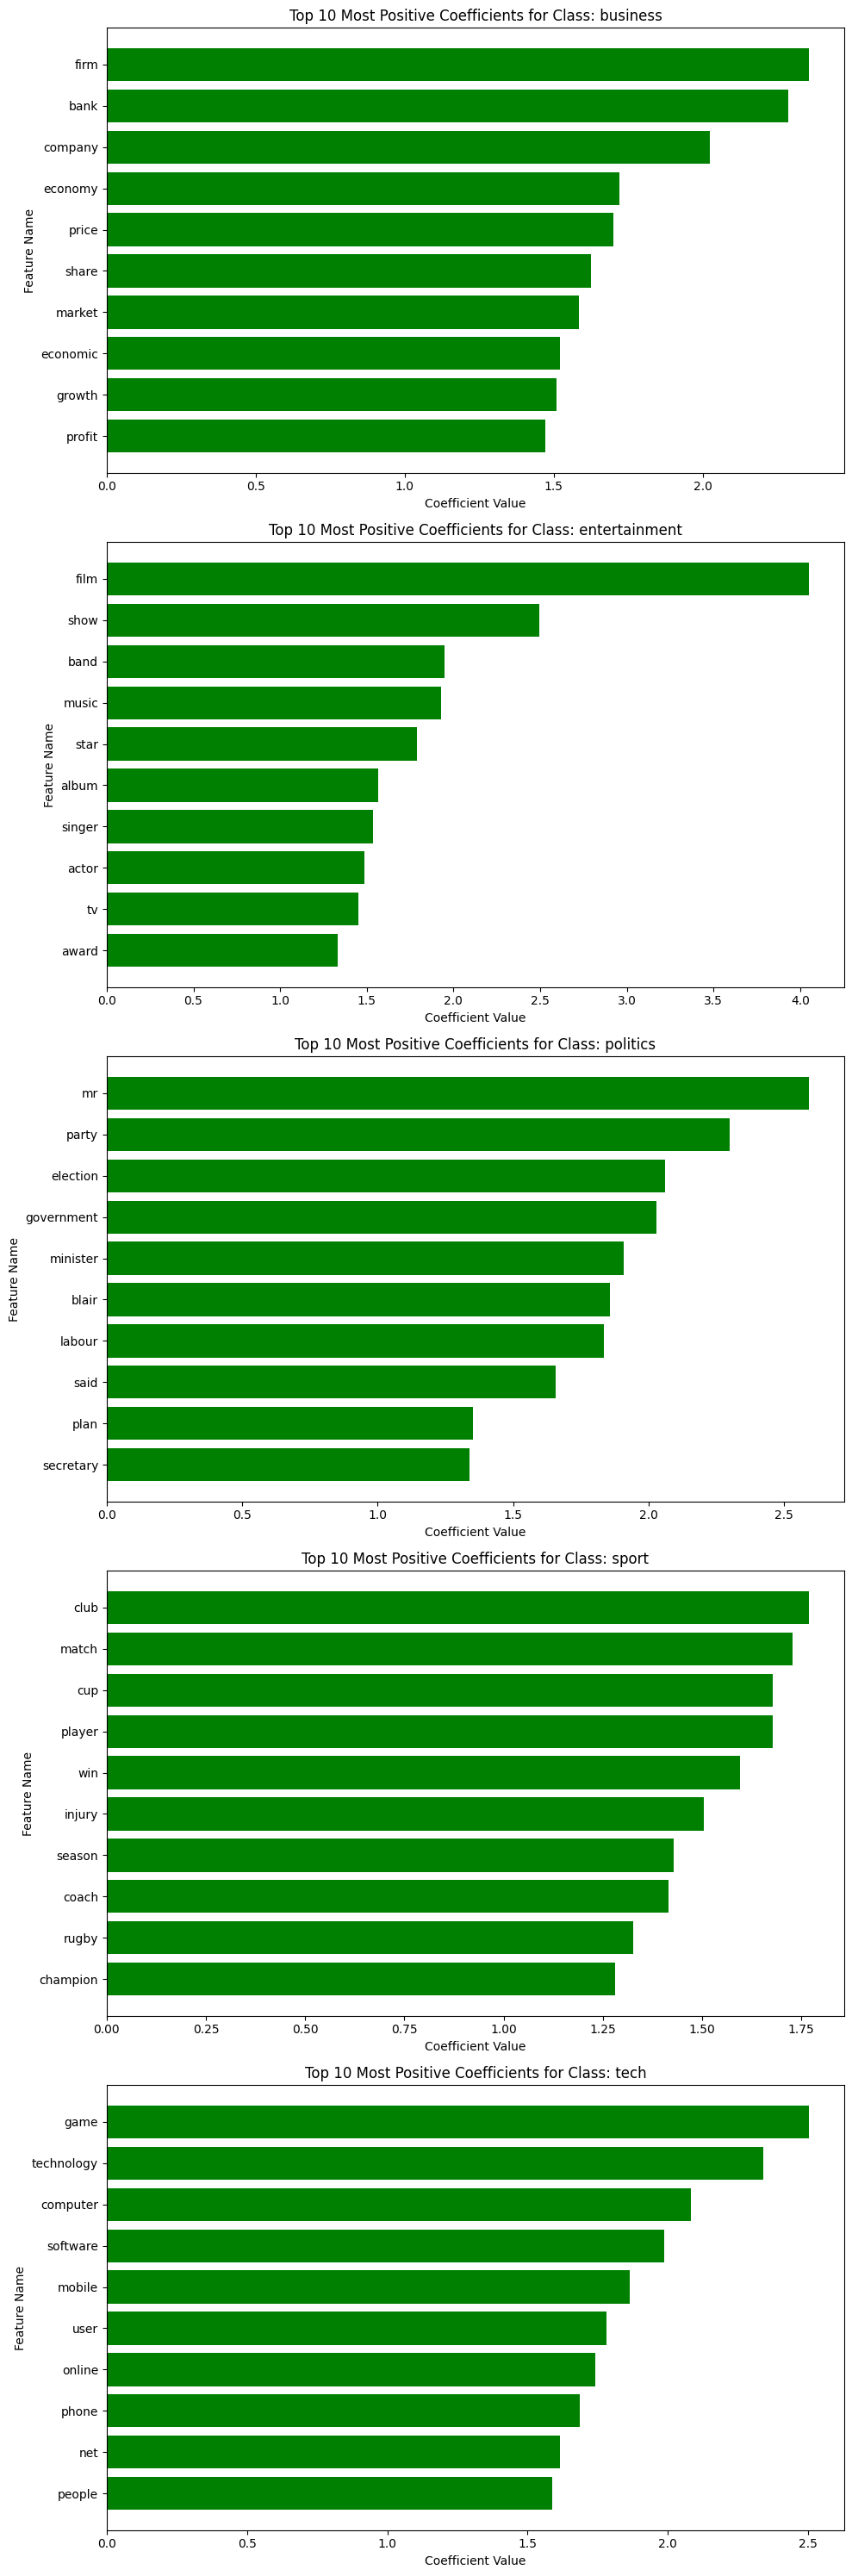

In [ ]:
# prompt: i need to plot the coefficient for each class

# Assuming you have the 'coefficients' array from your logistic regression model
# and the 'encoder' object used for label encoding.

# Get the number of classes
num_classes = len(encoder.classes_)

# Create a figure and axes for the subplots
fig, axes = plt.subplots(num_classes, 1, figsize=(10, 6 * num_classes))

# Iterate through each class
for i in range(num_classes):
  # Get the coefficients for the current class
  class_coefficients = lr.coef_[i]

  # Get the feature names from the vectorizer
  feature_names = vectorizer.get_feature_names_out()

  # Create a dictionary to store the coefficients and their corresponding feature names
  learned_func = dict(zip(feature_names, class_coefficients))

  # Extract the coefficients and feature names into separate lists
  feature_names = list(learned_func.keys())
  coefficients = list(learned_func.values())

  # Sort the coefficients in descending order
  sorted_coefficients = sorted(zip(coefficients, feature_names), reverse=True)

  # Get the top 10 most positive coefficients
  top_positive = sorted_coefficients[:10]

  # Plot the top positive coefficients for the current class
  axes[i].barh([feature[1] for feature in top_positive], [feature[0] for feature in top_positive], color='green')
  axes[i].set_xlabel('Coefficient Value')
  axes[i].set_ylabel('Feature Name')
  axes[i].set_title(f'Top 10 Most Positive Coefficients for Class: {encoder.classes_[i]}')
  axes[i].invert_yaxis()

plt.tight_layout()
plt.show()

In [ ]:
# prompt: descripe the previous figure

The code you provided performs text classification on a BBC news dataset. It involves several steps:


1. **Data Preparation:**
   - Reads a CSV file containing BBC news articles and their corresponding categories (labels).
   - Cleans the data by removing duplicates and preprocessing the text (tokenization, stop word removal, lemmatization).

2. **Feature Extraction:**
   - Uses TF-IDF (Term Frequency-Inverse Document Frequency) vectorization to convert text data into numerical features.

3. **Model Training:**
   - Trains a Logistic Regression model on the training data to classify news articles into different categories.

4. **Evaluation:**
   - Evaluates the model's performance using metrics such as accuracy, classification report, and confusion matrix.
   - Visualizes the confusion matrix using a heatmap.

5. **Error Analysis:**
   - Analyzes the distribution of text lengths for correctly and incorrectly classified articles.
   - Identifies specific examples of misclassifications (e.g., articles classified as "business" but actually belonging to "politics").
   - Counts word frequencies within these misclassified articles.

6. **Feature Importance:**
   - Plots the top 20 most frequent words for a specific misclassification type.
   - Visualizes the top 10 most positive coefficients learned by the logistic regression model for each category. This helps identify which words are most indicative of a particular category.



**In essence, the code aims to build a model capable of classifying news articles into their respective categories (business, entertainment, politics, sport, tech) and analyze potential errors and insights from the model's performance.**

In [ ]:
f(X) = w1x1 + w2x2

In [ ]:
# True business and said politics

business_politics = wrong_prediction[(wrong_prediction["y_test"] == "business") & (wrong_prediction["y_pred"] == "tech")]
business_politics

all_texts = " ".join(business_politics["data"].tolist())
all_texts

'BT offer equal access rival BT moved possible business offering cut wholesale broadband price open network rival The move come telecom regulator Ofcom said November firm must offer competitor real equality access phone line At time Ofcom offered BT choice change splitting two Ofcom carrying strategic review aimed promoting greater competition UK telecom sector BTs competitor frequently accused misusing status former telecom monopoly controller access many customer favour retail arm This latest submission delivered watchdog ahead deadline second phase review Central proposal plan BT offer operator lower wholesale price faster broadband service transparent access BTs local network former monopoly said statement The United Kingdom opportunity create exciting innovative telecom market world BT chief executive Ben Verwaayen said BT critical role play today making set proposal towards framework said BT want lighter regulation exchange change well removal threat The group set new Access Serv

In [ ]:
# prompt: make a dict with each word and its count

import re
from collections import defaultdict

def count_words(filename):
  word_counts = defaultdict(int)
  for word in all_texts.split():
        word_counts[word] += 1
  return dict(word_counts)

# Replace 'filename.txt' with the actual file path
word_counts = count_words(all_texts)
print(word_counts)

{'BT': 12, 'offer': 3, 'equal': 2, 'access': 5, 'rival': 3, 'moved': 1, 'possible': 3, 'business': 5, 'offering': 1, 'cut': 3, 'wholesale': 4, 'broadband': 5, 'price': 8, 'open': 1, 'network': 4, 'The': 10, 'move': 4, 'come': 3, 'telecom': 6, 'regulator': 2, 'Ofcom': 8, 'said': 16, 'November': 1, 'firm': 5, 'must': 1, 'competitor': 2, 'real': 4, 'equality': 1, 'phone': 1, 'line': 3, 'At': 1, 'time': 1, 'offered': 1, 'choice': 1, 'change': 3, 'splitting': 1, 'two': 3, 'carrying': 1, 'strategic': 1, 'review': 2, 'aimed': 1, 'promoting': 1, 'greater': 2, 'competition': 3, 'UK': 1, 'sector': 1, 'BTs': 3, 'frequently': 1, 'accused': 1, 'misusing': 1, 'status': 1, 'former': 2, 'monopoly': 2, 'controller': 1, 'many': 1, 'customer': 2, 'favour': 1, 'retail': 1, 'arm': 1, 'This': 2, 'latest': 1, 'submission': 2, 'delivered': 1, 'watchdog': 1, 'ahead': 1, 'deadline': 1, 'second': 1, 'phase': 2, 'Central': 1, 'proposal': 5, 'plan': 6, 'operator': 1, 'lower': 1, 'faster': 1, 'service': 5, 'transpa

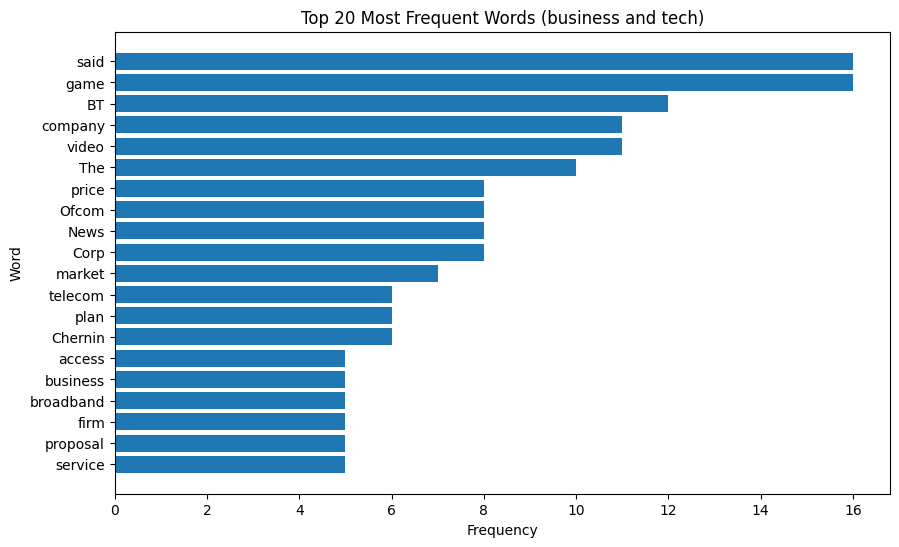

In [ ]:
# The most frequent words in wrong buisness text as tech

sorted_word_counts = dict(sorted(word_counts.items(), key=lambda item: item[1], reverse=True))

plt.figure(figsize=(10, 6))
plt.barh(list(sorted_word_counts.keys())[:20], list(sorted_word_counts.values())[:20])
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.title("Top 20 Most Frequent Words (business and tech)")
plt.gca().invert_yaxis()  # Invert y-axis to display most frequent words at the top
plt.show()

In [ ]:
df.to_csv('cleaned_BBC.csv', index=False)

In [ ]:
file_path = 'cleaned_BBC.csv'
bucket_name = 'my-text-classification-data'
object_name = 'cleaned_BBC.csv'

s3.upload_file(file_path, bucket_name, object_name)
print(f"File '{file_path}' uploaded to bucket '{bucket_name}' as '{object_name}'")

File 'cleaned_BBC.csv' uploaded to bucket 'my-text-classification-data' as 'cleaned_BBC.csv'


## SageMaker

In [ ]:
import boto3
import sagemaker
from sagemaker import get_execution_role


# Set up SageMaker session
session = sagemaker.Session()
role = get_execution_role()

# Load data from S3
bucket_name = 'my-text-classification-data'
data_key = 'cleaned_BBC.csv'
data_location = f's3://{bucket_name}/{data_key}'

df = pd.read_csv(data_location)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(df["data"], df["labels"], test_size=0.2, random_state=42)

# Save train and test data to S3
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

train_location = f's3://{bucket_name}/train/train.csv'
test_location = f's3://{bucket_name}/test/test.csv'

train_data.to_csv(train_location, index=False, header=False)
test_data.to_csv(test_location, index=False, header=False)

print(f"Training data saved to: {train_location}")
print(f"Test data saved to: {test_location}")

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/ec2-user/.config/sagemaker/config.yaml


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/fsspec/registry.py:279: UserWarning: Your installed version of s3fs is very old and known to cause
severe performance issues, see also https://github.com/dask/dask/issues/10276

To fix, you should specify a lower version bound on s3fs, or
update the current installation.

  warnings.warn(s3_msg)


Training data saved to: s3://my-text-classification-data/train/train.csv
Test data saved to: s3://my-text-classification-data/test/test.csv


## Comprehend

In [ ]:
import boto3
import pandas as pd
from tqdm import tqdm
import textwrap

# Initialize Comprehend client
comprehend = boto3.client('comprehend')

def chunk_text(text, max_chunk_size=4500):
    return textwrap.wrap(text, max_chunk_size, break_long_words=False, replace_whitespace=False)

def get_comprehend_features(text):
    chunks = chunk_text(text)

    entities = []
    key_phrases = []
    sentiments = []

    for chunk in chunks:
        # Entity recognition
        entities.extend(comprehend.detect_entities(Text=chunk, LanguageCode='en')['Entities'])

        # Key phrase extraction
        key_phrases.extend(comprehend.detect_key_phrases(Text=chunk, LanguageCode='en')['KeyPhrases'])

        # Sentiment analysis
        sentiments.append(comprehend.detect_sentiment(Text=chunk, LanguageCode='en'))

    # Aggregate results
    entity_types = list(set([e['Type'] for e in entities]))
    phrase_count = len(key_phrases)

    # Average sentiment scores
    sentiment_scores = {k: sum(s['SentimentScore'][k] for s in sentiments) / len(sentiments)
                        for k in ['Positive', 'Negative', 'Neutral', 'Mixed']}

    overall_sentiment = max(sentiment_scores, key=sentiment_scores.get)

    return {
        'entity_types': ' '.join(entity_types),
        'phrase_count': phrase_count,
        'sentiment': overall_sentiment,
        'positive_score': sentiment_scores['Positive'],
        'negative_score': sentiment_scores['Negative'],
        'neutral_score': sentiment_scores['Neutral'],
        'mixed_score': sentiment_scores['Mixed']
    }

# Load data
df = pd.read_csv(f's3://{bucket_name}/cleaned_BBC.csv')

# Extract features using Comprehend
features = []
for text in tqdm(df['data']):
    features.append(get_comprehend_features(text))

# Create a new DataFrame with Comprehend features
df_features = pd.DataFrame(features)

# Combine with original data
df_combined = pd.concat([df, df_features], axis=1)

# Save combined data back to S3
df_combined.to_csv(f's3://{bucket_name}/bbc_with_comprehend_features.csv', index=False)

print("Data with Comprehend features saved to S3")

100%|██████████| 2126/2126 [05:06<00:00,  6.94it/s]


Data with Comprehend features saved to S3


## Model training and Mlflow

In [ ]:
!pip install mlflow

  Using cached GitPython-3.1.43-py3-none-any.whl.metadata (13 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 6.4 MB/s eta 0:00:00
  Using cached gitdb-4.0.11-py3-none-any.whl.metadata (1.2 kB)
  Using cached smmap-5.0.1-py3-none-any.whl.metadata (4.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 63.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 16.0 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.2/233.2 kB 30.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.3/106.3 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 99.2 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 565.6/565.6 kB 58.0 MB/

In [ ]:
#### run in terminal !mlflow server --host 0.0.0.0 --port 5000

[2024-10-12 14:07:43 +0000] [15578] [INFO] Starting gunicorn 23.0.0
[2024-10-12 14:07:43 +0000] [15578] [INFO] Listening at: http://0.0.0.0:5000 (15578)
[2024-10-12 14:07:43 +0000] [15578] [INFO] Using worker: sync
[2024-10-12 14:07:43 +0000] [15579] [INFO] Booting worker with pid: 15579
[2024-10-12 14:07:44 +0000] [15580] [INFO] Booting worker with pid: 15580
[2024-10-12 14:07:44 +0000] [15581] [INFO] Booting worker with pid: 15581
[2024-10-12 14:07:44 +0000] [15582] [INFO] Booting worker with pid: 15582
^C
[2024-10-12 14:08:11 +0000] [15578] [INFO] Handling signal: int
[2024-10-12 14:08:11 +0000] [15579] [INFO] Worker exiting (pid: 15579)
[2024-10-12 14:08:11 +0000] [15581] [INFO] Worker exiting (pid: 15581)
[2024-10-12 14:08:11 +0000] [15582] [INFO] Worker exiting (pid: 15582)
[2024-10-12 14:08:11 +0000] [15580] [INFO] Worker exiting (pid: 15580)


In [ ]:
import sagemaker
from sagemaker import get_execution_role
from sagemaker.image_uris import retrieve
from sagemaker.session import s3_input
import mlflow
import mlflow.sagemaker
import boto3
import json

# Set up SageMaker session
session = sagemaker.Session()
bucket = 'my-text-classification-data'
prefix = 'xgboost-bbc'
role = get_execution_role()  # Get the execution role for SageMaker

# Set up MLflow
mlflow.set_tracking_uri("http://localhost:5000")  # Replace with your MLflow tracking server URI
mlflow.set_experiment("BBC-Text-Classification")

# Start an MLflow run
with mlflow.start_run():
    # Set up XGBoost estimator
    container = retrieve('xgboost', session.boto_region_name, version='latest')

    xgb_estimator = sagemaker.estimator.Estimator(
        container,
        role,
        instance_count=1,
        instance_type='ml.c5.2xlarge',
        volume_size=30,
        max_run=360000,
        input_mode='File',
        output_path=f's3://{bucket}/{prefix}/output',
        sagemaker_session=session
    )

    # Set hyperparameters
    hyperparameters = {
        'objective': 'multi:softprob',  # Multi-class classification
        'num_class': 5,  # Adjust based on the number of classes in your dataset
        'max_depth': 5,
        'eta': 0.1,
        'subsample': 0.8,
        'num_round': 100
    }
    xgb_estimator.set_hyperparameters(**hyperparameters)

    # Log hyperparameters to MLflow
    mlflow.log_params(hyperparameters)

    # Define input data
    train_data = s3_input(f's3://{bucket}/train/train.csv', content_type='text/csv')

    # Train the model
    xgb_estimator.fit({'train': train_data})
    print("Model training completed")

    # Log the model to MLflow
    mlflow.sagemaker.log_model(xgb_estimator.model_data, "xgboost-model")

    # Deploy the model to SageMaker
    predictor = xgb_estimator.deploy(initial_instance_count=1, instance_type='ml.m4.xlarge')
    print("Model deployed to SageMaker")

    # Create a Lambda function for inference
    lambda_client = boto3.client('lambda')

    lambda_code = """
    import json
    import boto3

    def lambda_handler(event, context):
        runtime = boto3.client('runtime.sagemaker')
        payload = json.dumps(event)
        response = runtime.invoke_endpoint(EndpointName='ENDPOINT_NAME',
                                           ContentType='application/json',
                                           Body=payload)
        result = json.loads(response['Body'].read().decode())
        return result
    """

    lambda_code = lambda_code.replace('ENDPOINT_NAME', predictor.endpoint_name)

    try:
        response = lambda_client.create_function(
            FunctionName='BBCTextClassifier',
            Runtime='python3.8',
            # Role='arn:aws:iam::YOUR_ACCOUNT_ID:role/YOUR_LAMBDA_ROLE',  # Replace with your Lambda execution role
            Handler='lambda_function.lambda_handler',
            Code={'ZipFile': lambda_code.encode()},
            Description='Lambda function for BBC text classification'
        )
        print("Lambda function created")
    except lambda_client.exceptions.ResourceConflictException:
        print("Lambda function already exists. Updating code...")
        response = lambda_client.update_function_code(
            FunctionName='BBCTextClassifier',
            ZipFile=lambda_code.encode()
        )
        print("Lambda function updated")

    # Log the Lambda function ARN to MLflow
    mlflow.log_param("lambda_function_arn", response['FunctionArn'])

print("Pipeline completed")


INFO:sagemaker.image_uris:Ignoring unnecessary instance type: None.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
INFO:sagemaker:Creating training-job with name: xgboost-2024-10-12-14-37-15-187


2024-10-12 14:37:17 Starting - Starting the training job...
2024-10-12 14:37:32 Starting - Preparing the instances for training...
2024-10-12 14:38:13 Downloading - Downloading the training image...
2024-10-12 14:38:39 Training - Training image download completed. Training in progress..Arguments: train
[2024-10-12:14:38:48:INFO] Running standalone xgboost training.
[2024-10-12:14:38:48:INFO] Path /opt/ml/input/data/validation does not exist!
[2024-10-12:14:38:48:INFO] File size need to be processed in the node: 2.48mb. Available memory size in the node: 7880.85mb
[2024-10-12:14:38:48:ERROR] Customer Error: Non-numeric value 'L' found in the header line 'Liverpool pledge keep Gerrard Liverpool chief exec...' of file 'train.csv'. CSV format require no header line in it. If header line is already removed, XGBoost does not accept non-numeric value in the data.
Traceback (most recent call last):
  File "/opt/amazon/lib/python3.7/site-packages/sage_xgboost/train.py", line 41, in main
    sta

2024/10/12 14:39:32 INFO mlflow.tracking._tracking_service.client: 🏃 View run receptive-ram-225 at: http://localhost:5000/#/experiments/745970330335358498/runs/b37d581b1afd4f668bec2243631a0819.
2024/10/12 14:39:32 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/745970330335358498.


UnexpectedStatusException: Error for Training job xgboost-2024-10-12-14-37-15-187: Failed. Reason: ClientError: Non-numeric value 'L' found in the header line 'Liverpool pledge keep Gerrard Liverpool chief exec...' of file 'train.csv'. CSV format require no header line in it. If header line is already removed, XGBoost does not accept non-numeric value in the data., exit code: 1. Check troubleshooting guide for common errors: https://docs.aws.amazon.com/sagemaker/latest/dg/sagemaker-python-sdk-troubleshooting.html

In [ ]:
iam_client = session.client('iam')

# Function to get the role ARN
def get_role_arn(role_name):
    try:
        role = iam_client.get_role(RoleName=role_name)
        return role['Role']['Arn']
    except iam_client.exceptions.NoSuchEntityException:
        print(f"Role {role_name} does not exist.")
        return None

In [ ]:
!aws iam list-roles


{
    "Roles": [
        {
            "Path": "/aws-service-role/autoscaling.amazonaws.com/",
            "RoleName": "AWSServiceRoleForAutoScaling",
            "RoleId": "AROA2S7UONUWT4CYKRYF3",
            "Arn": "arn:aws:iam::727972736301:role/aws-service-role/autoscaling.amazonaws.com/AWSServiceRoleForAutoScaling",
            "CreateDate": "2023-12-21T11:57:59Z",
            "AssumeRolePolicyDocument": {
                "Version": "2012-10-17",
                "Statement": [
                    {
                        "Effect": "Allow",
                        "Principal": {
                            "Service": "autoscaling.amazonaws.com"
                        },
                        "Action": "sts:AssumeRole"
                    }
                ]
            },
            "Description": "Default Service-Linked Role enables access to AWS Services and Resources used or managed by Auto Scaling",
            "MaxSessionDuration": 3600
        },
        {
            "P